The aim of the notebook is to apply logistic regression to the titanic survival dataset. The final outcome of the dataset is to the predict whether the survival of a given passenger details with the appropriate feature vectors could survive or not.

As it is a classification problem, the machine learning algorithm we are using is logistic regression.
Finally we will be calculating the accuracy of the model.

In [136]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
train = pd.read_csv('titanic_train.csv')

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First let us examine if there are any null values in the dataset. The following peice of code gives us the count of the number of null values in each column

In [139]:
count = 0
for i in train.isnull():
    count = 0
    for j in train.isnull()[i]:
        if j:
            count = count + 1
    print(i,':',count) 

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


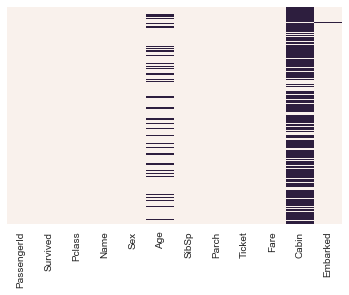

In [140]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False)
#putting up a visualisation of the missing values

In [141]:
sns.set_style('whitegrid')

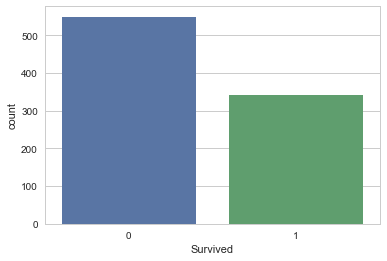

In [142]:
sns.countplot(x='Survived',data = train)
# to know about the people who survived and who did not survived

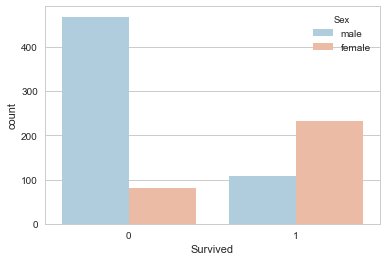

In [143]:
sns.countplot( x = 'Survived',hue='Sex',data =train, palette= 'RdBu_r')
#now we are going to see how many males and females survived.
#with differentiated bar chart 
#males have died more asusual. :P

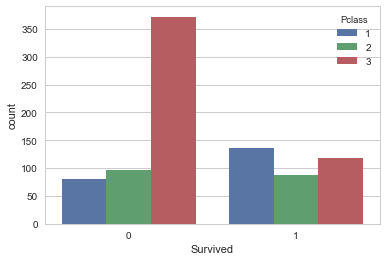

In [144]:
sns.countplot(x='Survived',data = train,hue='Pclass')
#now we are going to visualise the Passenger class
#people of 1,2 P class have more survival

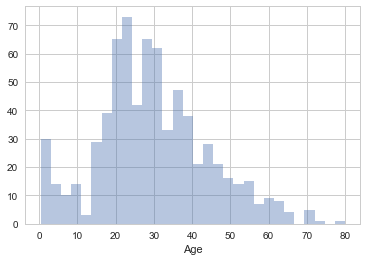

In [145]:
sns.distplot(train['Age'].dropna(),kde = False,bins = 30)
#in order to see the age distribution of the passengers on board.
# dropna method drops the null values because remember we had null
#values in Age column

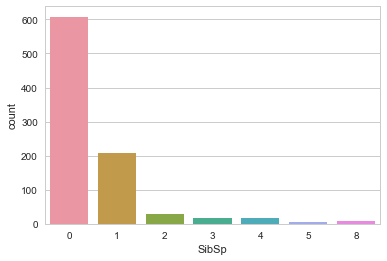

In [146]:
sns.countplot(x ='SibSp',data = train)

In [147]:
#from this plot you can infer that most of the people travelled where
#single or couples probably
#very less people travelled as a joint family or a whole family

Now before fitting the model we have to take care of the missing values which we found that are existing in the data set. First wel will remove the missing values in the age dataset by filling the proper number relevant to the dataset. 
For that let us examine the average mean age of the Passenger class groups.

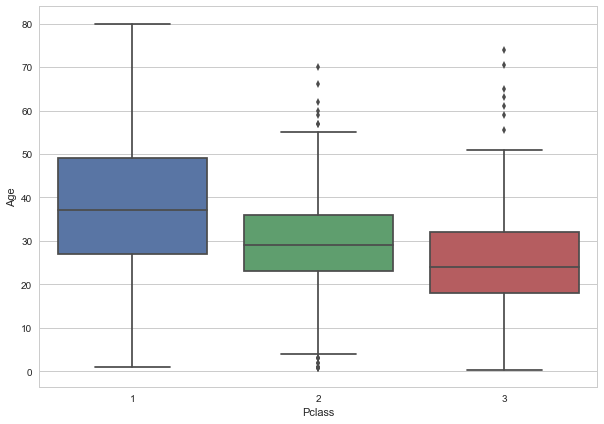

In [148]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data = train)

So we observe that the age of the 1 class group is somewhere around group 37, for class 2 it is around 29, for class 3 it is around 24. So we are defining a function which is going to take Pclass and Age values of individual values, and if age is empty then , according to the corresponding Pclass value it will return the mean average age of that particular Pclass.

In [149]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2 :
            return 29
        else: 
            return 24
    else :
        return Age

In [150]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis = 1)

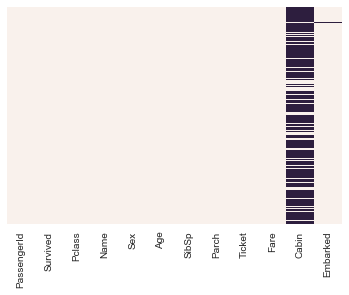

In [151]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False)

In [152]:
train.drop('Cabin',axis =1 , inplace = True)
#now we are droping the row cabin as it is not numerical and statistical method over strings cannot be applied
#for generealisation

In [153]:
train.dropna(inplace = True)

In [154]:
sex =pd.get_dummies(train['Sex'],drop_first = True)

In [155]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [156]:
train  = pd.concat([train,sex,embark],axis = 1) #concating new columns


In [157]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1 , inplace = True) #removing old columns


In [158]:
train.drop('PassengerId', axis = 1 , inplace = True )

In [159]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [160]:
y = train['Survived']
x = train.drop('Survived',axis =1)

In [161]:
from sklearn.linear_model import LogisticRegression

logmodel  = LogisticRegression()
logmodel.fit(x ,y) #fitting the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
from sklearn.model_selection import train_test_split
 #splitting the data 

In [163]:
xtr, xte,ytr,yte = train_test_split(x,y,test_size = 0.3)

In [164]:
predictions = logmodel.predict(xte) #predicting the results

In [165]:
from sklearn.metrics import classification_report


In [166]:
print(classification_report(yte,predictions)) #calculating accuracy 

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       160
          1       0.79      0.70      0.74       107

avg / total       0.80      0.81      0.80       267

